1. In 250-500 words, write a thorough explanation in markdown in your notebook of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. You may need to do additional research on this than what exists in the readings.

Machine learning can be categorized as a subset of artificial intelligence, as it takes computer algorithms to build a model of data based on a certain group, or "training" data. It then takes both the data given and the training data and predicts values that either accurately or unaccurately represent the data, and create decisions that the computer can take based on results. ML is best used in cases where there is a large group of data, complex relationships in data, and for instances that relate more to the real world such as fraud, or ad recommendations, machine learning can use its model to analyze and make predictions on data that would rather seem unattainable or too big to handle. These types of data also allow the model to work correctly because they provide the correct standards for data analyzation. ML shouldn't be used for small data sets, or for data sets that are constantly changing. It would be really hard to create a model for the stock market, for example, because it is continually changing and fluctuating, and any model that could be used to predict future values would probably be inaccurate. Therefore, ML can be a useful tool in certain markets, but it's important to remember when and under which conditions a model to predict data would be beneficial.  

In [16]:
#2 Perform pre-processing on the dataset. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. Depending on your dataset you may need to create new columns from the existent data you have.
import pandas as pd
import numpy as np
import seaborn as sns
titanic_df = pd.read_csv('titanic.csv')


# technique 1 - size map
size_map = {'male':1, 'female':2}
titanic_df['Sex'] = titanic_df['Sex'].map(size_map)
titanic_df.head()

#technique 2 - Label Encoder to value
from sklearn.preprocessing import LabelEncoder

class_labels = LabelEncoder()
titanic_df['Embarked'] = class_labels.fit_transform(titanic_df['Embarked'].values)
titanic_df.tail(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",1,33.0,0,0,349257,7.8958,NaN,2
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",2,22.0,0,0,7552,10.5167,NaN,2
883,884,0,2,"Banfield, Mr. Frederick James",1,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,2
884,885,0,3,"Sutehall, Mr. Henry Jr",1,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,2
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",2,39.0,0,5,382652,29.1250,NaN,1
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.7500,NaN,1


In [10]:
# technique 3 - One Hot Encoding
titanic_df = pd.get_dummies(titanic_df[['Cabin']])
titanic_df.head(10)

,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

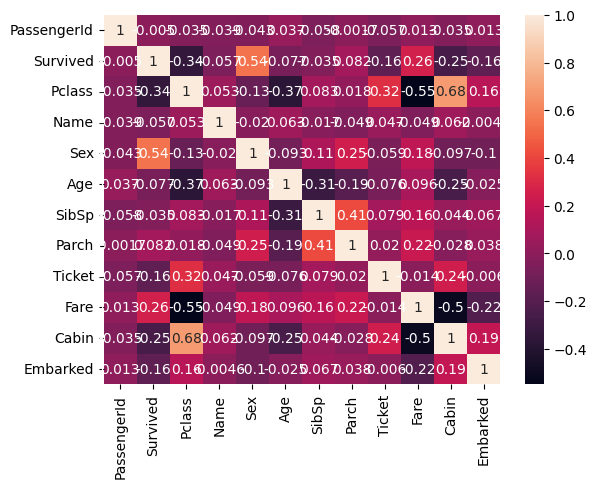

In [19]:
# 3  Create a correlation matrix with a heatmap for the features. Use markdown to write about your takeaways in under 200 words. Perform feature selection from this. You should likely not be selecting more than 10 features. 
titanic_df['Name'] = class_labels.fit_transform(titanic_df['Name'].values)
titanic_df['Ticket'] = class_labels.fit_transform(titanic_df['Ticket'].values)
titanic_df['Cabin'] = class_labels.fit_transform(titanic_df['Cabin'].values)
titanic_df.corr()
sns.heatmap(titanic_df.corr(), annot=True)

One takeaway from the heatmap are the boxes that are strongly correlated with each other. For example, the cabin and passenger class have a correlation of 0.68, which makes sense because the lower class passengers were most likely associated with cabins that matched their price and class range, and same with upper class passengers. Another strong correlation can be found between fare and cabin, which also makes sense because the price paid matches with the type of room given. One box that is interesting is the correlation between Survived and Sex, which is at 0.54. This can be due to when the Titanic was being unloaded with lifeboats, women and children were put on first, so a lot of the deaths on the Titanic are males. This doesn't mean that women didn't die, but that there is a stronger connection towards one gender and their survival rate.

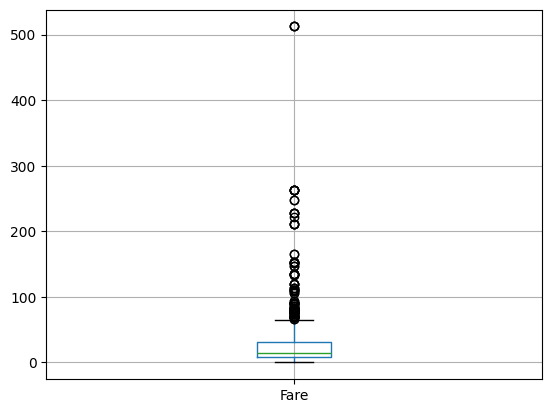

In [34]:
#4 Create a box and whisker plot for loan_amounts if using the Lending Club dataset and fare if using the Titanic dataset. How do you handle the null values? What does this box and whisker plot show you?
boxplot = titanic_df.boxplot(column = ['Fare'], return_type='axes')

The box and whisker plot above shows the prices that people paid to get on to the Titanic. The plot shows that majority of people on board paid between 5-30 dollars, and that even though there are many passengers who paid above 50 dollars, there was such a vast majority of people who paid so little that most upper class passengers are considered "outliers". The null values probably skewed the mean if there are passengers whos fare is unknown, and it may create for error i 

In [30]:
#5 If using the Titanic dataset: create a new column called age_bin that groups people into at least 4 age ranges. 
titanic_df['Age'].max()
titanic_df['age_bin'] = titanic_df['Age'].apply(lambda age: 
    'Young' if age < 20 else
    'Adult' if age < 40 else
    'Old' if age < 60 else
    'Eldest')
                                                
titanic_df.head(10)
titanic_df.tail(10)
                                     
                   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin
881,882,0,3,510,1,33.0,0,0,394,7.8958,147,2,Adult
882,883,0,3,193,2,22.0,0,0,508,10.5167,147,2,Adult
883,884,0,2,61,1,28.0,0,0,565,10.5000,147,2,Adult
884,885,0,3,793,1,25.0,0,0,650,7.0500,147,2,Adult
885,886,0,3,684,2,39.0,0,5,480,29.1250,147,1,Adult
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2,Adult
887,888,1,1,303,2,19.0,0,0,14,30.0000,30,2,Young
888,889,0,3,413,2,NaN,1,2,675,23.4500,147,2,Eldest
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0,Adult
890,891,0,3,220,1,32.0,0,0,466,7.7500,147,1,Adult


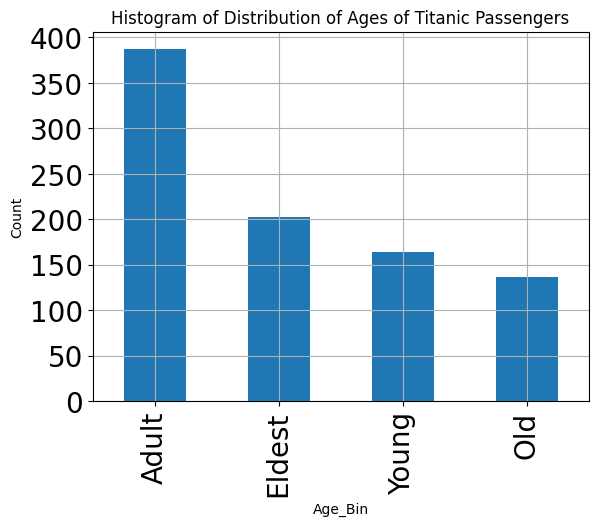

In [33]:
#6 If using the Titanic dataset, create subplot histograms to show how fares differ by age_bin. 
import matplotlib.pyplot as plt
age_count= titanic_df["age_bin"].value_counts()

age_count.plot(kind="bar")
plt.xlabel('Age_Bin')
plt.ylabel('Count')
plt.title('Histogram of Distribution of Ages of Titanic Passengers')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()